# RICH AI Exploratory Data Analysis

Notes
- Labels are 0: Muon, 1: Pion, 2: Positron
- Likelihood labels are different [Pion, Muon, Positron]

In [1]:
import h5py 
import numpy as np 
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import glob

# Helper functions

In [2]:
def read_RICHAI_data(file_paths):
    """Read in all the 2018 RICHAI data
    
    Parameters
    ----------
    file_paths : list of str
        List of file paths of all data sets.
        
    Returns
    -------
    data_files : dict
        Dictionary of HFD data sets     
    """
    data_files = {}
    for file_path in file_paths:
        name = file_path.split("/")[4] + "/" + file_path.split("/")[5].split(".")[0]
        data_files[name] = h5py.File(file_path)
    
    return data_files

In [3]:
def events_to_pandas(dfile):
    """Convert HDF5 events data to Pandas"""
    
    df = pd.DataFrame()
    
    # event features
    df["run_id"] = dfile["Events"]["run_id"]
    df["burst_id"] = dfile["Events"]["burst_id"]
    df["event_id"] = dfile["Events"]["event_id"]
    df["track_id"] = dfile["Events"]["track_id"]
    df["track_momentum"] = dfile["Events"]["track_momentum"]
    df["chod_time"] = dfile["Events"]["chod_time"]
    df["ring_radius"] = dfile["Events"]["ring_radius"]
    df["ring_centre_pos_x"] = dfile["Events"]["ring_centre_pos"][:, 0]
    df["ring_centre_pos_y"] = dfile["Events"]["ring_centre_pos"][:, 1]
    
    # TODO: check w/ TRIUMF if this is correct
    df["ring_likelihood_pion"] = dfile["Events"]["ring_likelihood"][:, 0]
    df["ring_likelihood_muon"] = dfile["Events"]["ring_likelihood"][:, 1]
    df["ring_likelihood_positron"] = dfile["Events"]["ring_likelihood"][:, 2]
    
    # labels
    mu_off = dfile.attrs["muon_offset"]
    pi_off = dfile.attrs["pion_offset"]
    pos_off = dfile.attrs["positron_offset"]
    entries = dfile.attrs["entries"]
    
    labels = np.zeros(entries, dtype=np.int32)
    labels[mu_off:pi_off] = 0
    labels[pi_off:pos_off] = 1
    labels[pos_off:] = 2
    
    df["label"] = labels
    
    return df

In [4]:
file_paths = glob.glob("/data/bvelghe/capstone2022/*/*")
data_files = read_RICHAI_data(file_paths)
data_files.keys()

dict_keys(['A/Run008563', 'A/Run008548', 'A/Run008564', 'A/Run008553', 'A/Run008562', 'C/2018E', 'B/2018B'])

# DataFrame

In [5]:
df = events_to_pandas(data_files['A/Run008563'])
df.head()

,run_id,burst_id,event_id,track_id,track_momentum,chod_time,ring_radius,ring_centre_pos_x,ring_centre_pos_y,ring_likelihood_pion,ring_likelihood_muon,ring_likelihood_positron,label
0,8563,1502,19187,0,29.086382,24.875072,181.268814,-4.406287,31.420258,1.229546e-08,1.0,9.656426e-02,0
1,8563,1502,43695,0,29.131575,23.019239,180.360535,-33.380520,81.289101,2.874574e-05,1.0,1.647658e-09,0
2,8563,1502,53258,0,53.725155,7.871216,187.981369,-124.974808,-26.034964,3.173104e-01,1.0,9.871307e-02,0
3,8563,1502,79840,1,45.426033,15.969522,181.346909,-159.838486,-44.940845,1.382166e-01,1.0,2.374848e-01,0
4,8563,1502,88854,0,51.754585,23.295773,186.581955,-131.870239,-39.216457,7.380376e-01,1.0,5.661391e-02,0


In [6]:
# this matches Bob's documentation on https://github.com/TRIUMF-Capstone2022/RICHPID/tree/main/docs
df["label"].value_counts()

0    162478
1     17602
2      1767
Name: label, dtype: int64

# Plots

## Distribution of track momentum for each particle

Text(0.5, 0, 'Track momentum')

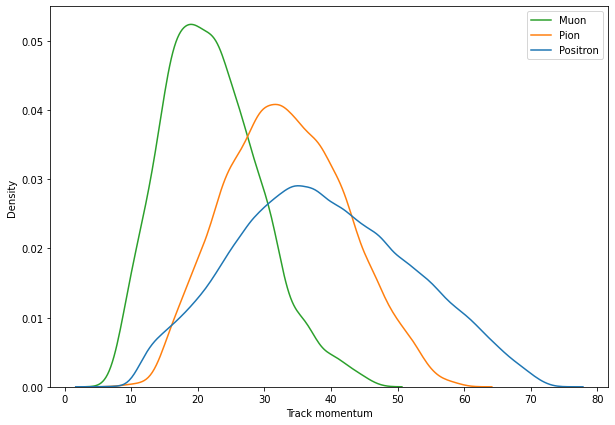

In [12]:
plt.figure(figsize=(10, 7))
sns.kdeplot(df["track_momentum"], hue=df["label"], common_norm=False, palette="tab10")
plt.legend(labels=["Muon","Pion", "Positron"]);
plt.xlabel("Track momentum" )